In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

# Pandas Objects

## Series Object

In [3]:
# Series is a one-dimensional array of indexed data
data = pd.Series([0.25, 0.5, 0.75, 1.0]) # index is optional
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

### As Generalized NumPy Array

While the NumPy array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

In [6]:
data = pd.Series(
    [0.25, 0.5, 0.75, 1.0],
    index=['a', 'x', 'c', 'd'] # index can be defined as anything
)
data

a    0.25
x    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['c']

0.75

### As Specialized Dictionary

A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure that maps typed keys to a set of typed values. This improves performance.

In [8]:
population_dict = {
    'California': 39538223, 
    'Texas': 29145505,
    'Florida': 21538187, 
    'New York': 20201249,
    'Pennsylvania': 13002700
}

population = pd.Series(population_dict)
population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [9]:
population['California']

39538223

In [10]:
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

## DataFrame Object

A DataFrame is a collection of Series objects.

### As Generalized NumPy Array

In [11]:
area_dict = {
    'California': 423967, 
    'Texas': 695662, 
    'Florida': 170312,
    'New York': 141297, 
    'Pennsylvania': 119280
}
area = pd.Series(area_dict)
area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

In [12]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [13]:
states.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

In [14]:
states.columns

Index(['population', 'area'], dtype='object')

### As Specialized Dictionary

Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of
column data.

In [15]:
states['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

### From Numpy Structured Array

In [16]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [17]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# Indexing

## Series

In [18]:
data = pd.Series(
    [0.25, 0.5, 0.75, 1.0],
    index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [19]:
data['b']

0.5

In [20]:
'a' in data

True

In [21]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [22]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [23]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Slicing

Slicing may be the source of the most confusion. Notice that when slicing
with an explicit index (e.g., data['a':'c']), the final index is included in the slice,
while when slicing with an implicit index (e.g., data[0:2]), the final index is excluded
from the slice.

In [24]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [25]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

### Indexers

What if the explicit index is also integer-based?

In [26]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [27]:
# explicit index when indexing
data[1]

'a'

In [28]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides
some special indexer attributes that explicitly expose certain indexing schemes.

#### Loc

In [29]:
data.loc[1] # explicit indexing

'a'

In [30]:
data.loc[1:3] # explicit slicing

1    a
3    b
dtype: object

#### iLoc

In [31]:
data.iloc[1] # implicit indexing

'b'

In [32]:
data.iloc[1:3] # implicit slicing

3    b
5    c
dtype: object

## DataFrame

First, while indexing refers to columns, slicing refers to rows.

In [33]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'Florida': 170312, 'New York': 141297, 'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505, 'Florida': 21538187, 'New York': 20201249, 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700


In [34]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [35]:
data.values

array([[  423967, 39538223],
       [  695662, 29145505],
       [  170312, 21538187],
       [  141297, 20201249],
       [  119280, 13002700]], dtype=int64)

In [36]:
data.T

,California,Texas,Florida,New York,Pennsylvania
area,423967,695662,170312,141297,119280
pop,39538223,29145505,21538187,20201249,13002700


In [37]:
data.iloc[:3, :2]

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [38]:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [39]:
data['density'] = data['pop'] / data['area']
data.loc[data.density > 120, ['pop', 'density']]

,pop,density
Florida,21538187,126.463121
New York,20201249,142.970120


In [40]:
data[data.density > 120] # direct masking operations are interpreted row-wise

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


# Handling Missing Values

The distinction between None and NaN in Pandas is subtle:

- None represents a missing entry, but its type is not numeric. This means that any column (Series) that contains a None cannot be of type numeric (e.g. int and float).
- NaN, which stands for not-a-number, is a numeric type. This means that NaN can appear in columns of type int and float.

## Arithmetic

In [41]:
#None + 5 # is a type error

In [42]:
np.nan + 5

nan

## Numeric Series

In [43]:
s = pd.Series([3, None]) # None converted to nan
s

0    3.0
1    NaN
dtype: float64

In [44]:
s = pd.Series([3, np.nan])
s

0    3.0
1    NaN
dtype: float64

## Non-Numeric Series

In [45]:
s = pd.Series(["3",None]) # For non-numeric Series, None does not get casted to NaN
s

0       3
1    None
dtype: object

In [46]:
s = pd.Series(["3",np.nan])
s

0      3
1    NaN
dtype: object

## Equality

In [47]:
None == None

True

In [48]:
np.nan == np.nan

False

In [49]:
# equating anything with NaN will result in False:
np.nan == None

False

## Detect missing values

In [50]:
# to check nan or None
pd.isnull(np.nan)

True

In [51]:
pd.isnull(None)

True

### Series

In [52]:
data = pd.Series([1, np.nan, 'hello', None])

In [53]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [54]:
data[data.notnull()]

0        1
2    hello
dtype: object

### DataFrame

In [55]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [56]:
df.isnull()

,0,1,2
0,False,True,False
1,False,False,False
2,True,False,False


In [57]:
df.isnull().sum()

0    1
1    1
2    0
dtype: int64

## Dropping Null Values

### Series

In [58]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [59]:
data.dropna()

0        1
2    hello
dtype: object

### DataFrame

In [60]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop entire rows or col‐
umns. Depending on the application, you might want one or the other.

In [61]:
df.dropna() # by default drop rows with any nulls

,0,1,2
1,2.0,3.0,5


In [62]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


### DataFrame Finer Control

In [63]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [64]:
df.dropna(axis='columns', how='all') # how = 'any' or 'all'

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [65]:
# specify a minimum number of non-null values for the row/column to be kept
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


## Filling Null Values

In [66]:
data = pd.Series(
    [1, np.nan, 2, None, 3], 
    index=list('abcde'), 
    dtype='Int32')
data

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

In [67]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: Int32

In [68]:
# forward fill
data.fillna(method='ffill') # or bfill

a    1
b    1
c    2
d    2
e    3
dtype: Int32

In [69]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [70]:
# for df also specify an axis
df.fillna(method='ffill', axis=1) 

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Aggregation and Grouping

## Simple

In [71]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [72]:
ser.mean()

0.5623850983416314

In [73]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [74]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [75]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [76]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.477888,0.443420
std,0.353125,0.426952
min,0.058084,0.020584
25%,0.155995,0.181825
50%,0.601115,0.212339
75%,0.708073,0.832443
max,0.866176,0.969910


## GroupBy

In [77]:
rng = np.random.RandomState(0)
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': range(6),
    'data2': rng.randint(0, 10, 6)},
    columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### DataFrame GroupBy

In [78]:
df.groupby('key')

In [79]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


### Series GroupBy

In [80]:
df.groupby('key')['data1']

In [81]:
df.groupby('key')['data1'].sum()

key
A    3
B    5
C    7
Name: data1, dtype: int64

## Iteration over groups

In [82]:
for (k, g) in df.groupby('key'):
    print('key={0} , shape={1}'.format(k, g.shape))

key=A , shape=(2, 3)
key=B , shape=(2, 3)
key=C , shape=(2, 3)


## Dispatch methods

Any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects.

In [83]:
df.groupby('key')['data1'].describe()

,count,mean,std,min,25%,50%,75%,max
key,,,,,,,,
A,2.0,1.5,2.12132,0.0,0.75,1.5,2.25,3.0
B,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
C,2.0,3.5,2.12132,2.0,2.75,3.5,4.25,5.0


In [84]:
df.groupby('key')['data1'].describe().unstack()

       key
count  A      2.00000
       B      2.00000
       C      2.00000
mean   A      1.50000
       B      2.50000
       C      3.50000
std    A      2.12132
       B      2.12132
       C      2.12132
min    A      0.00000
       B      1.00000
       C      2.00000
25%    A      0.75000
       B      1.75000
       C      2.75000
50%    A      1.50000
       B      2.50000
       C      3.50000
75%    A      2.25000
       B      3.25000
       C      4.25000
max    A      3.00000
       B      4.00000
       C      5.00000
dtype: float64

# Pivot Tables

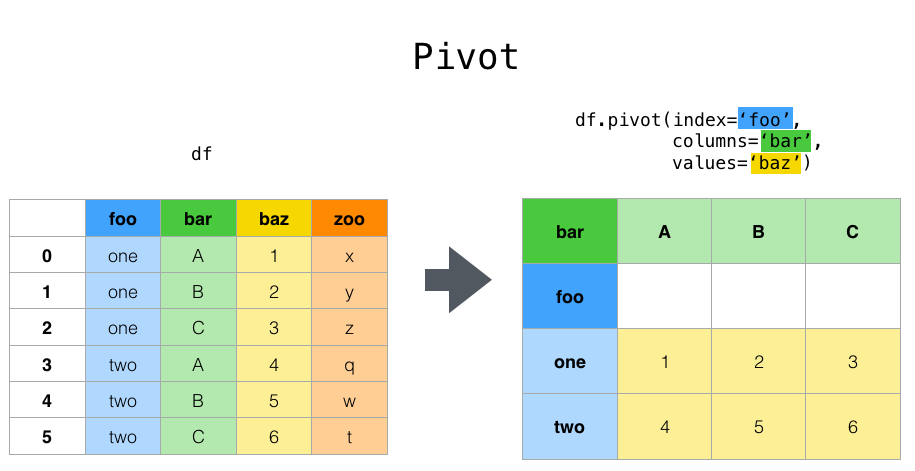

In [85]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Simple Pivot Table

In [86]:
titanic.pivot_table(values='survived', index='sex', columns='class', aggfunc='mean')
# aggfunc is mean by default

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [87]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':sum, 'fare':'mean'})
# note that the first argument values='survived' is moved into the aggfunc here

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

## Multilevel Pivot Tables

In [88]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [89]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Margin

In [90]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Hierarchical Indexing

A MultiIndex, also known as a multi-level index or hierarchical index, allows you to have multiple columns acting as a row identifier, while having each index column related to another through a parent/child relationship.

In [91]:
index = [('California', 2010), ('California', 2020), 
         ('New York', 2010), ('New York', 2020), 
         ('Texas', 2010), ('Texas', 2020)]

populations = [37253956, 39538223,
               19378102, 20201249,
               25145561, 29145505]
pop = pd.Series(populations, index=index)
pop

(California, 2010)    37253956
(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
(Texas, 2020)         29145505
dtype: int64

In [92]:
index = pd.MultiIndex.from_tuples(index)

In [93]:
pop = pop.reindex(index)
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

## Indexing

In [94]:
pop[:, 2020]

California    39538223
New York      20201249
Texas         29145505
dtype: int64

The result is a singly indexed Series with just the keys we’re interested in. This syntax is much more convenient (and the operation is much more efficient!) than the home spun tuple-based multi-indexing solution that we started with

## Unstack

In [95]:
pop_df = pop.unstack() # gives dataframe
pop_df

,2010,2020
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [96]:
pop_df.stack() # gives Series

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

# Vectorized String Operations

Unlike NumPy, Pandas provides this. 

In [97]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s if s is None else s.capitalize() for s in data] # bad 

['Peter', 'Paul', None, 'Mary', 'Guido']

In [98]:
names = pd.Series(data)
names.str.capitalize() # better

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [99]:
names.str.startswith('P')

0    False
1     True
2     None
3    False
4    False
dtype: object

# Others

## Rename

In [100]:
population_dict = {
    'California': 39538223, 
    'Texas': 29145505,
    'Florida': 21538187, 
    'New York': 20201249,
    'Pennsylvania': 13002700
}

population = pd.Series(population_dict)

area_dict = {
    'California': 423967, 
    'Texas': 695662, 
    'Florida': 170312,
    'New York': 141297, 
    'Pennsylvania': 119280
}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [102]:
states.rename(columns={'area': 'volume'})

,population,volume
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [104]:
states.rename(index={'California': 'chennai', 1: 'bengaluru'})

,population,area
chennai,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280
